In [134]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [135]:
# read in all our data
movie_data = pd.read_csv("IMDB Dataset.csv")

In [136]:
# Set seed for reproducibility
np.random.seed(0) 

In [137]:
# Check that Dataset has been loaded
movie_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [138]:
movie_data.shape

(50000, 2)

In [139]:
movie_data.info

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [140]:
# Get the number of missing data points per column
missing_values_count = movie_data.isnull().sum()

print(missing_values_count)

review       0
sentiment    0
dtype: int64


Text(0.5, 0, 'Count')

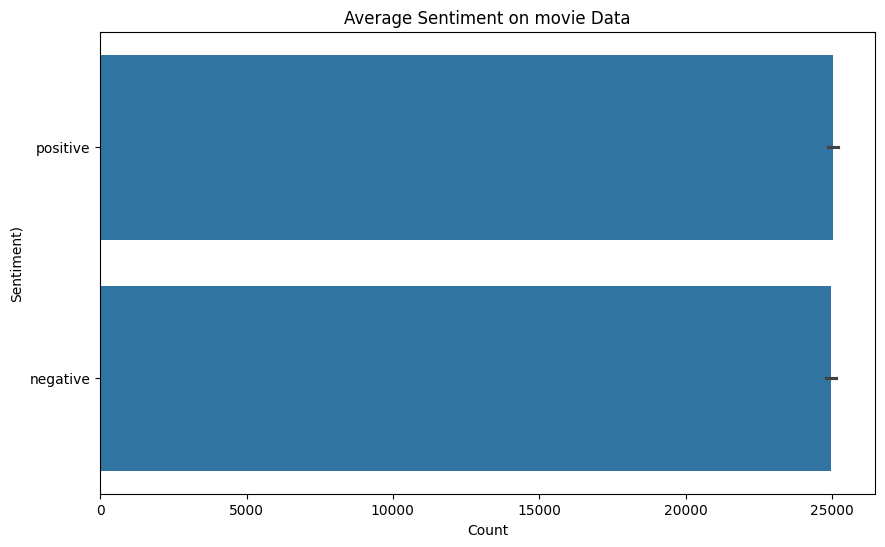

In [141]:


# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Average Sentiment on movie Data")

# Bar chart showing average movie sentiment
sns.barplot(x=movie_data.index, y=movie_data['sentiment'])

# Add label for vertical axis
plt.ylabel("Sentiment)")

# Add label for vertical axis
plt.xlabel("Count")

In [170]:
# Get the number of positive counts in the 'sentiment' column
positive_counts = (movie_data['sentiment'] == 'positive').sum()

# Get the number of negative counts in the 'sentiment' column
negative_counts = (movie_data['sentiment'] == 'negative').sum()

print(positive_counts)
print(negative_counts)

25000
25000


In [171]:
# Preprocess data fur deeper analysis

In [172]:
#  Text Cleaning
# Remove HTML Tags: 

from bs4 import BeautifulSoup

# Function to remove HTML tags from text
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    cleaned_text = soup.get_text()
    return cleaned_text

# Apply the function to remove HTML tags from the 'review' column
movie_data['review'] = movie_data['review'].apply(remove_html_tags)

In [173]:
# Convert to Lowercase: Convert all text to lowercase to ensure consistency in text processing
movie_data['review'] = movie_data['review'].str.lower()


In [174]:
# Remove special characters:

import re

# Define a function to remove special characters, punctuation, and symbols
def remove_special_characters(text):
    # Remove special characters, punctuation, and symbols using regular expressions
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# Apply the function to the 'review' column
movie_data['review'] = movie_data['review'].apply(remove_special_characters)

In [175]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [178]:
# Remove Stopwords: Remove common stopwords (e.g., 'the', 'is', 'and') as they do not carry much meaning for sentiment analysis.

import nltk
from nltk.corpus import stopwords

# Download the stopwords 
nltk.download('stopwords')

# Get the list of stopwords
stop_words = set(stopwords.words('english'))

# Define a function to remove stopwords
def remove_stopwords(text):
    # Tokenize the text into words
    words = text.split()
    # Remove stopwords from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the filtered words back into a single string
    filtered_text = ' '.join(filtered_words)
    return filtered_text

# Apply the function to the 'review' column
movie_data['review'] = movie_data['review'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/avriljack/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [179]:
# Download the 'punkt' tokenizer models again
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/avriljack/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [180]:
# Tokenize the text into individual words or tokens to prepare it for further processing.

from nltk.tokenize import word_tokenize

# Tokenize the text
movie_data['review_tokens'] = movie_data['review'].apply(word_tokenize)

In [181]:

# LemmatizE the text:
movie_data['review_tokens']

0        [one, reviewers, mentioned, watching, oz, epis...
1        [wonderful, little, production, filming, techn...
2        [thought, wonderful, way, spend, time, hot, su...
3        [basically, theres, family, little, boy, jake,...
4        [petter, matteis, love, time, money, visually,...
                               ...                        
49995    [thought, movie, right, good, job, wasnt, crea...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [catholic, taught, parochial, elementary, scho...
49998    [im, going, disagree, previous, comment, side,...
49999    [one, expects, star, trek, movies, high, art, ...
Name: review_tokens, Length: 50000, dtype: object

In [182]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [183]:
# Download wordnet corpus
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/avriljack/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [184]:
# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [185]:
# Define a function to lemmatize the text:
def lemmatize_text(text):
    # Tokenize the text into words
    tokens = word_tokenize(text)
    # Lemmatize each word and join them back into a string
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in tokens])
    return lemmatized_text

In [186]:
# Apply lemmatization to the review column
movie_data['review_lemmatized'] = movie_data['review'].apply(lemmatize_text)

In [187]:
# Define a dictionary for contractions and abbreviations
contractions_dict = {
   "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
}

abbreviations_dict = {
   "etc.": "et cetera",
    "e.g.": "for example",
    "i.e.": "that is",
    "Mr.": "Mister",
    "Mrs.": "Missus",
    "Dr.": "Doctor",
    "Prof.": "Professor",
    "St.": "Saint",
    "Ave.": "Avenue",
    "Rd.": "Road",
    "Jan.": "January",
    "Feb.": "February",
    "Mar.": "March",
    "Apr.": "April",
    "Jun.": "June",
    "Jul.": "July",
    "Aug.": "August",
    "Sep.": "September",
    "Oct.": "October",
    "Nov.": "November",
    "Dec.": "December",
    "Inc.": "Incorporated",
    "Corp.": "Corporation",
    "Ltd.": "Limited",
    "Co.": "Company",
    "Dept.": "Department",
    "Univ.": "University",
    "Gov.": "Government",
    "Mgr.": "Manager",
    "Gen.": "General",
    "Capt.": "Captain",
    "Adm.": "Admiral",
    "Sgt.": "Sergeant",
    "Dr.": "Drive",
    "Blvd.": "Boulevard",
    "Apt.": "Apartment",
    "Prof.": "Professor",
    "Mgr.": "Manager",
    "Sr.": "Senior",
    "Jr.": "Junior",
    "Bros.": "Brothers",
    "Sis.": "Sisters",
    "U.S.": "United States",
    "U.K.": "United Kingdom",
}

# Define a function to expand contractions and abbreviations
def expand_contractions_and_abbreviations(text):
    # Expand contractions
    for contraction, expansion in contractions_dict.items():
        text = text.replace(contraction, expansion)
    # Replace abbreviations
    for abbreviation, full_form in abbreviations_dict.items():
        text = text.replace(abbreviation, full_form)
    return text

# Apply the function to the 'review' column
movie_data['review_expanded'] = movie_data['review'].apply(expand_contractions_and_abbreviations)

In [188]:
# Define a function to remove numerical digits
def remove_digits(text):
    # Use regular expression to remove numerical digits
    text = re.sub(r'\d+', '', text)
    return text

# Apply the function to the 'review' column
movie_data['review'] = movie_data['review'].apply(remove_digits)

In [189]:
# Remove any extra whitespaces or newline characters from the text to ensure consistency.
movie_data['review'] = movie_data['review'].str.strip()


In [190]:
# Join tokens back into text
movie_data['clean_review'] = movie_data['review_tokens'].apply(lambda tokens: ' '.join(tokens))

In [191]:
# Perform a final check
print(movie_data['clean_review'].head())

0    one reviewers mentioned watching oz episode yo...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically theres family little boy jake thinks...
4    petter matteis love time money visually stunni...
Name: clean_review, dtype: object


In [192]:
# Split the Data: Split the data into training and testing sets to evaluate the performance of your sentiment analysis model.

from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = movie_data['review']  # Features
y = movie_data['sentiment']  # Target

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (40000,) (40000,)
Testing set shape: (10000,) (10000,)


In [193]:
# Convert the text data into numerical features that can be used by the logistic regression model (FEATURE EXTRACTION)

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Print the shapes of the transformed training and testing sets
print("Training set shape (after TF-IDF vectorization):", X_train_tfidf.shape)
print("Testing set shape (after TF-IDF vectorization):", X_test_tfidf.shape)

Training set shape (after TF-IDF vectorization): (40000, 186199)
Testing set shape (after TF-IDF vectorization): (10000, 186199)


In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train_tfidf, y_train)

# Predict the labels for the testing data
y_pred = logreg.predict(X_test_tfidf)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8959


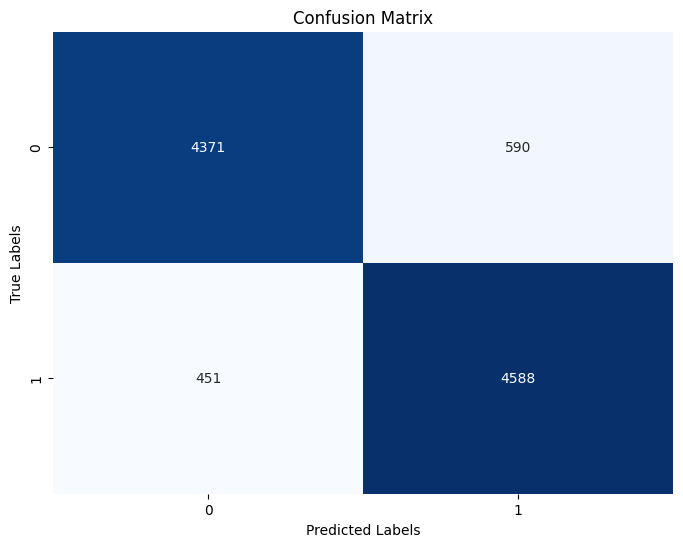

In [195]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [196]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for each class
precision_negative = precision_score(y_test, y_pred, pos_label='negative')
recall_negative = recall_score(y_test, y_pred, pos_label='negative')
f1_negative = f1_score(y_test, y_pred, pos_label='negative')

precision_positive = precision_score(y_test, y_pred, pos_label='positive')
recall_positive = recall_score(y_test, y_pred, pos_label='positive')
f1_positive = f1_score(y_test, y_pred, pos_label='positive')

# Print the results
print("Class 'negative' - Precision:", precision_negative)
print("Class 'negative' - Recall:", recall_negative)
print("Class 'negative' - F1-score:", f1_negative)

print("Class 'positive' - Precision:", precision_positive)
print("Class 'positive' - Recall:", recall_positive)
print("Class 'positive' - F1-score:", f1_positive)

Class 'negative' - Precision: 0.9064703442554957
Class 'negative' - Recall: 0.8810723644426527
Class 'negative' - F1-score: 0.8935909230297455
Class 'positive' - Precision: 0.8860563924295095
Class 'positive' - Recall: 0.9104981147052986
Class 'positive' - F1-score: 0.8981109914847802


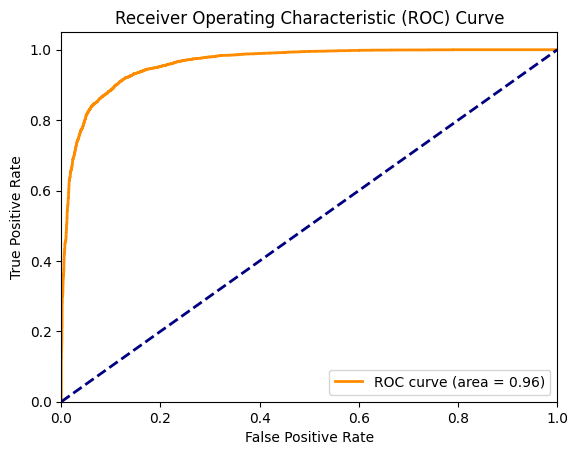

AUC Score: 0.9614844567143466


In [197]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate predicted probabilities for positive class
y_prob = logreg.predict_proba(X_test_tfidf)[:, 1]

# Compute ROC curve and ROC area for positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='positive')
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print("AUC Score:", roc_auc)

In [168]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Perform cross-validation
cv_scores = cross_val_score(logreg, X_train_tfidf, y_train, cv=5)  # Use 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the average cross-validation score
avg_cv_score = cv_scores.mean()
print("Average Cross-Validation Score:", avg_cv_score)

Cross-Validation Scores: [0.892375 0.889375 0.8945   0.887    0.888   ]
Average Cross-Validation Score: 0.89025


In [200]:
pip install wordcloud matplotlib nltk

Note: you may need to restart the kernel to use updated packages.


In [201]:
from bs4 import BeautifulSoup

In [202]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [203]:

# Filter positive and negative sentiment reviews
positive_reviews = movie_data[movie_data['sentiment'] == 'positive']['review']
negative_reviews = movie_data[movie_data['sentiment'] == 'negative']['review']


In [204]:
# Define a function to preprocess the text data
def preprocess_text(text):
    # Remove HTML tags if any
    text = BeautifulSoup(text, "html.parser").get_text()
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)


In [205]:
# Preprocess positive and negative sentiment reviews
positive_reviews = positive_reviews.apply(preprocess_text)
negative_reviews = negative_reviews.apply(preprocess_text)

In [206]:
# Concatenate all preprocessed reviews for each sentiment category
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

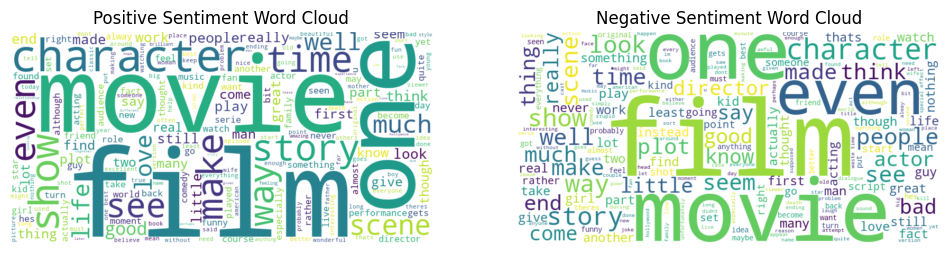

In [207]:
# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.show()

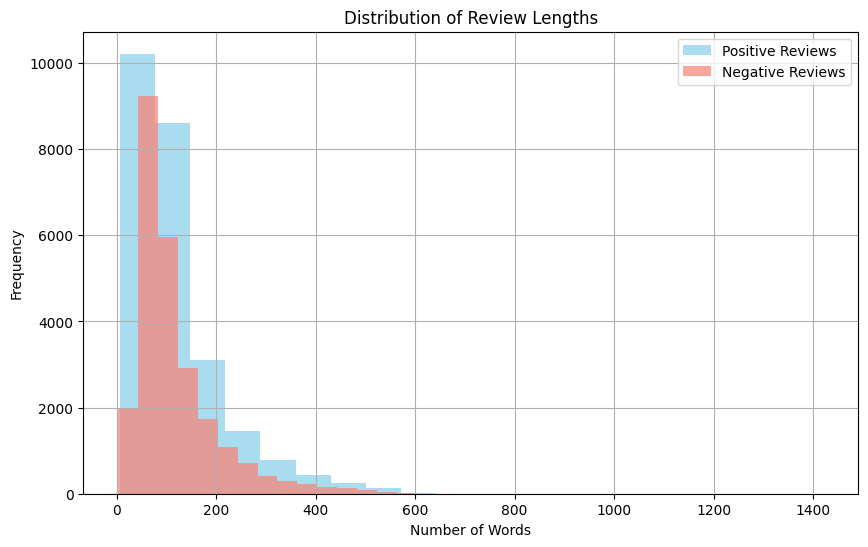

In [208]:
# Calculate the length of each review (number of words) for positive and negative sentiment reviews
positive_review_lengths = positive_reviews.apply(lambda x: len(x.split()))
negative_review_lengths = negative_reviews.apply(lambda x: len(x.split()))

# Plot histograms for review lengths
plt.figure(figsize=(10, 6))

plt.hist(positive_review_lengths, bins=20, color='skyblue', alpha=0.7, label='Positive Reviews')
plt.hist(negative_review_lengths, bins=20, color='salmon', alpha=0.7, label='Negative Reviews')

plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()